<a href="https://colab.research.google.com/github/ShylaTatum/Group-Project-1/blob/Rian-Branch/Profit_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do Imports

In [1]:
# Install the required libraries
!pip install prophet

Import The CSV

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_data.csv to Cleaned_data.csv


In [3]:
import pandas as pd

df = pd.read_csv('Cleaned_data.csv')


In [4]:
display(df.head(10))

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0.0,0.0,0.0,2.0,2.0,0.0,0,4.0
5,2017,4160,Iceland,Northern Europe,1 - Male,AAA,Infectious and parasitic diseases,103,1124,5.0,24.0,47.0,320.0,507.0,0.0,0,1124.0
6,2017,4160,Iceland,Northern Europe,1 - Male,B34,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
7,2017,4160,Iceland,Northern Europe,1 - Male,B44,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
8,2017,4160,Iceland,Northern Europe,1 - Male,C02,Neoplasms,103,2,0.0,0.0,0.0,0.0,1.0,0.0,0,2.0
9,2017,4160,Iceland,Northern Europe,1 - Male,C04,Neoplasms,103,1,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0


In [5]:
# Filter rows where 'years' is 2017, 2018, or 2019
filtered_df = df[df['Year'].isin([2017, 2018, 2019])]

# Display the filtered DataFrame
display(filtered_df.head(10))

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0.0,0.0,0.0,2.0,2.0,0.0,0,4.0
5,2017,4160,Iceland,Northern Europe,1 - Male,AAA,Infectious and parasitic diseases,103,1124,5.0,24.0,47.0,320.0,507.0,0.0,0,1124.0
6,2017,4160,Iceland,Northern Europe,1 - Male,B34,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
7,2017,4160,Iceland,Northern Europe,1 - Male,B44,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
8,2017,4160,Iceland,Northern Europe,1 - Male,C02,Neoplasms,103,2,0.0,0.0,0.0,0.0,1.0,0.0,0,2.0
9,2017,4160,Iceland,Northern Europe,1 - Male,C04,Neoplasms,103,1,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0


Show Top 5 Leading Causes Of Deaths "Country/Year_2017-2019"

In [6]:
# Filter the dataset for the years 2017, 2018, and 2019
filtered_df = df[df['Year'].isin([2017, 2018, 2019])]

# Group by Year, Country Name, and ICD Code, and sum the Deaths: All Ages for each group
df_grouped = filtered_df.groupby(['Year', 'Country Name', 'ICD Code']).agg({'Deaths: All Ages': 'sum'}).reset_index()

# Sort the grouped data to find the top 5 leading causes of death for each country and year
df_grouped_sorted = df_grouped.sort_values(['Year', 'Country Name', 'Deaths: All Ages'], ascending=[True, True, False])

# For each country and year, take the top 5 causes of death
top_5_deaths = df_grouped_sorted.groupby(['Year', 'Country Name']).head(5)

# Reset the index to clean up the DataFrame
top_5_deaths.reset_index(drop=True, inplace=True)

# Display the result
top_5_deaths


,Year,Country Name,ICD Code,Deaths: All Ages
0,2017,Australia,AAA,161083
1,2017,Australia,C349,8141
2,2017,Australia,F03,8078
3,2017,Australia,I219,7530
4,2017,Australia,I259,6786
...,...,...,...,...
165,2019,United States of America,AAA,2854838
166,2019,United States of America,I251,163502
167,2019,United States of America,C349,136327
168,2019,United States of America,J449,119291


Predictions

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare to store models and predictions
models = {}
future_years = np.array([[2020], [2021], [2022], [2023], [2024]])

# Loop through each country and ICD Code to fit a model
for country_name in top_5_deaths['Country Name'].unique():
    for icd_code in top_5_deaths['ICD Code'].unique():
        # Filter the data for the specific country and ICD Code
        df_subset = top_5_deaths[(top_5_deaths['Country Name'] == country_name) &
                                               (top_5_deaths['ICD Code'] == icd_code)]

        if len(df_subset) > 1:  # Need at least 2 data points to fit a model
            X = df_subset[['Year']].values
            y = df_subset['Deaths: All Ages'].values

            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X, y)

            # Store the model for future predictions
            models[(country_name, icd_code)] = model

# Prepare to store predictions
predictions = []

# Make predictions for future years
for (country_name, icd_code), model in models.items():
    future_counts = model.predict(future_years)

    for year, count in zip(future_years.flatten(), future_counts):
        predictions.append({
            'Country Name': country_name,
            'ICD Code': icd_code,
            'Year': year,
            'predicted_count': count
        })

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Sort the predictions to identify the top 5 causes of death for each country/year
top_five_predictions = predictions_df.sort_values(['Country Name', 'Year', 'predicted_count'], ascending=[True, True, False])

# Get the top 5 ICD Codes for each country and year
top_five_predictions = top_five_predictions.groupby(['Country Name', 'Year']).head(5)

# Display the result
display(top_five_predictions)




,Country Name,ICD Code,Year,predicted_count
0,Australia,AAA,2020,1.707807e+05
10,Australia,F03,2020,9.306000e+03
5,Australia,C349,2020,9.047000e+03
20,Australia,I259,2020,6.410667e+03
15,Australia,I219,2020,6.168667e+03
...,...,...,...,...
254,United States of America,AAA,2024,2.959854e+06
264,United States of America,I251,2024,1.633867e+05
259,United States of America,C349,2024,1.191867e+05
269,United States of America,J449,2024,1.161740e+05


Graphing Prediction
Tunisia was dropped because it only had one year of data.

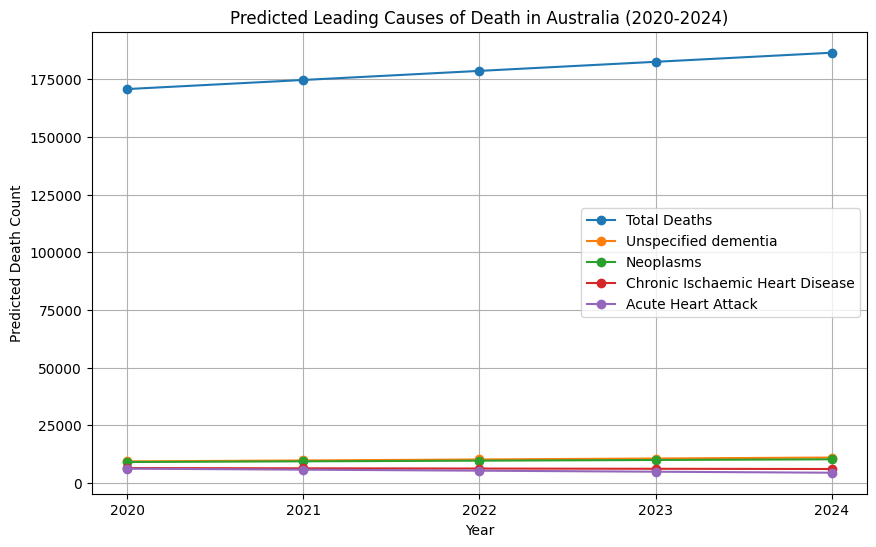

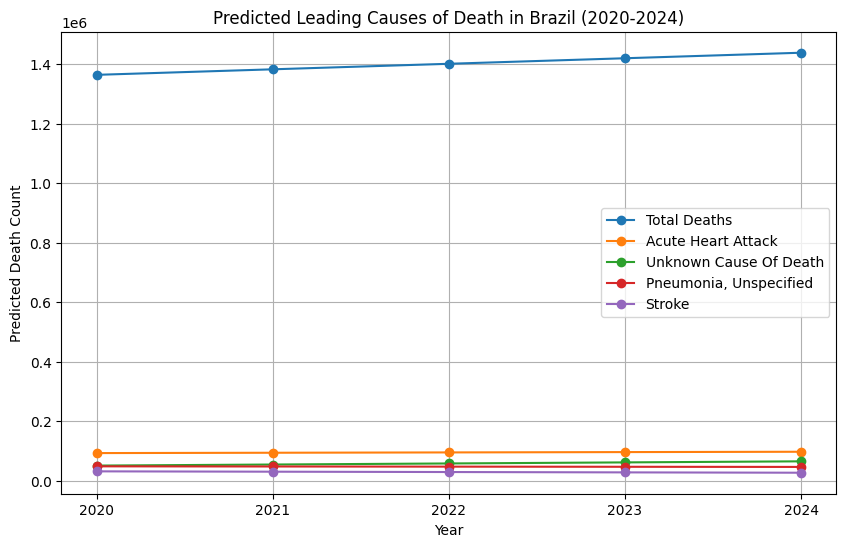

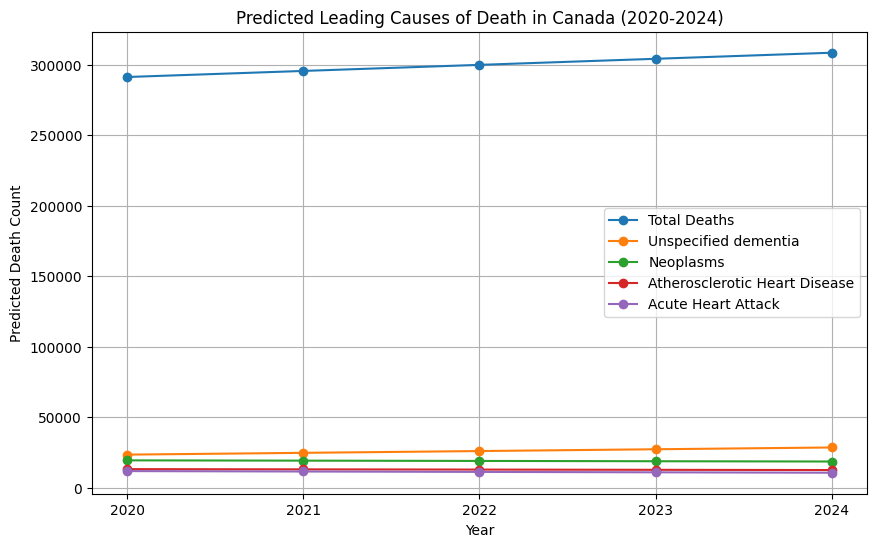

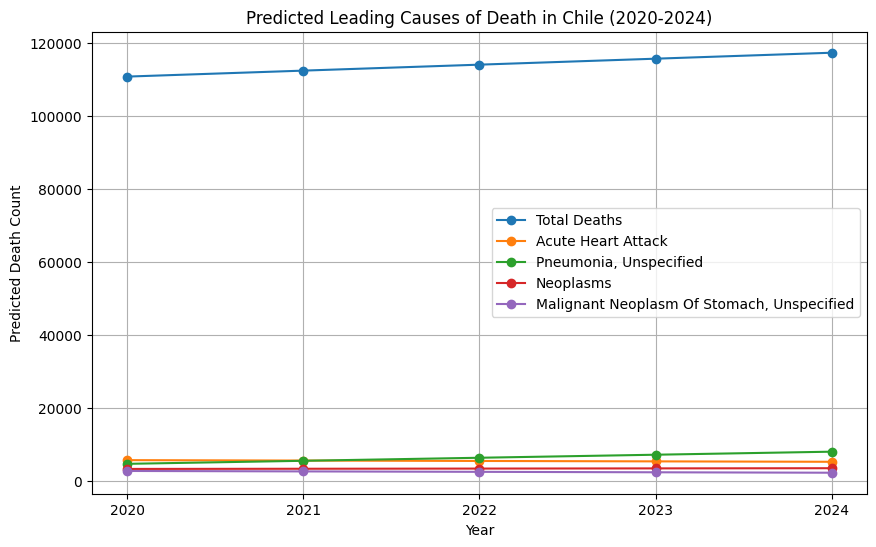

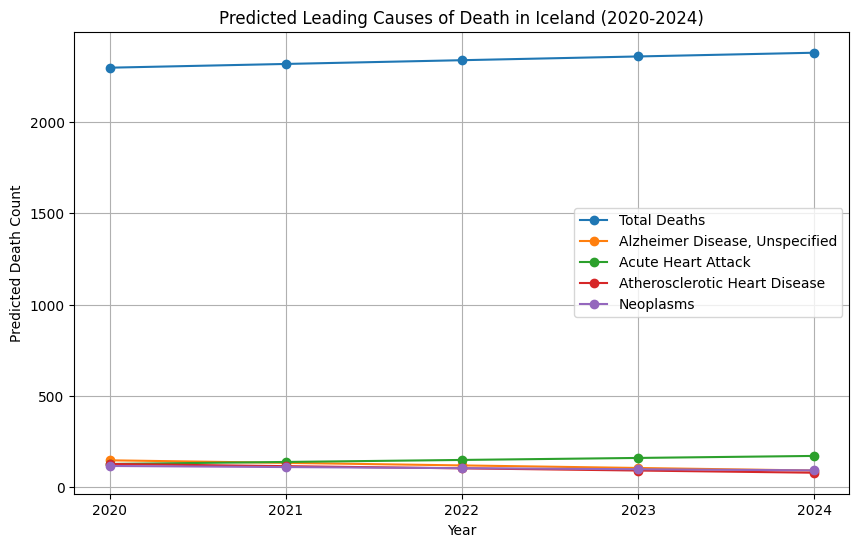

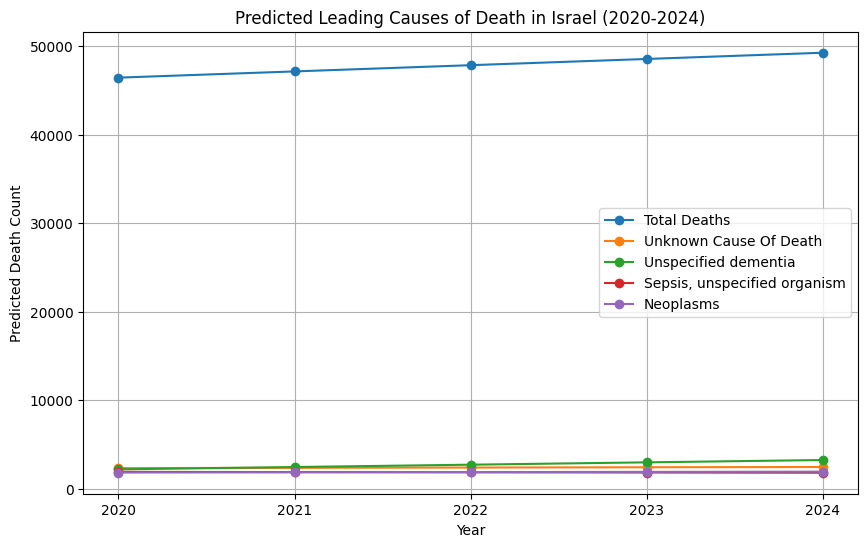

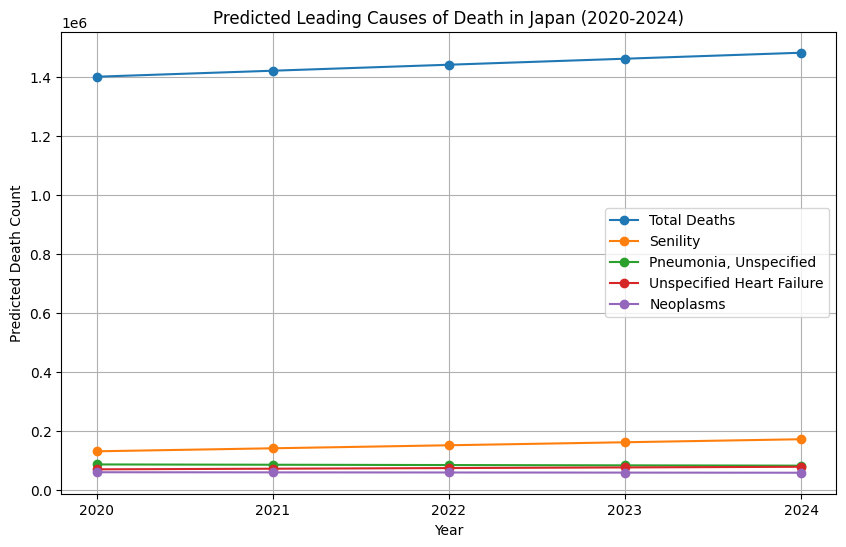

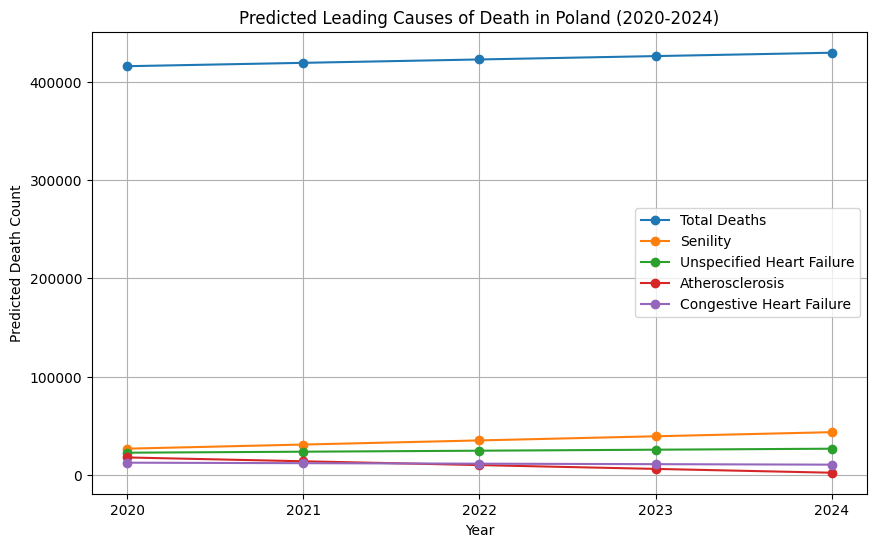

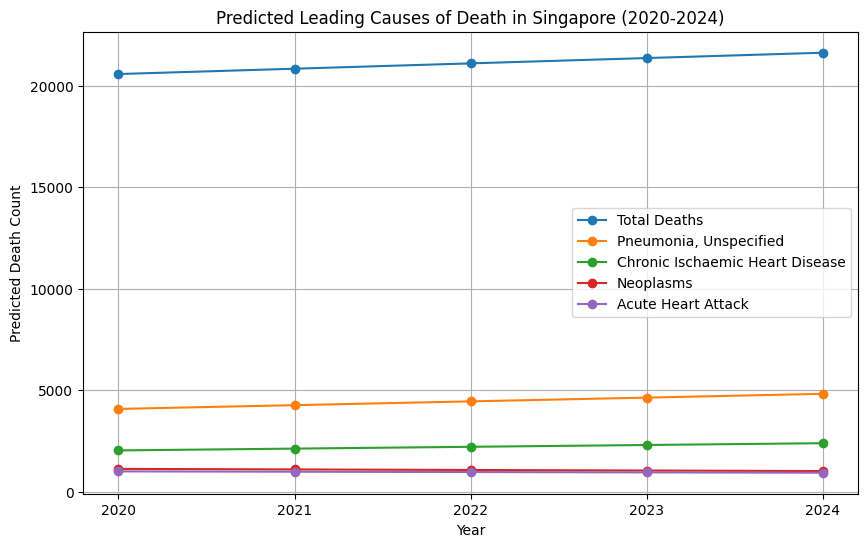

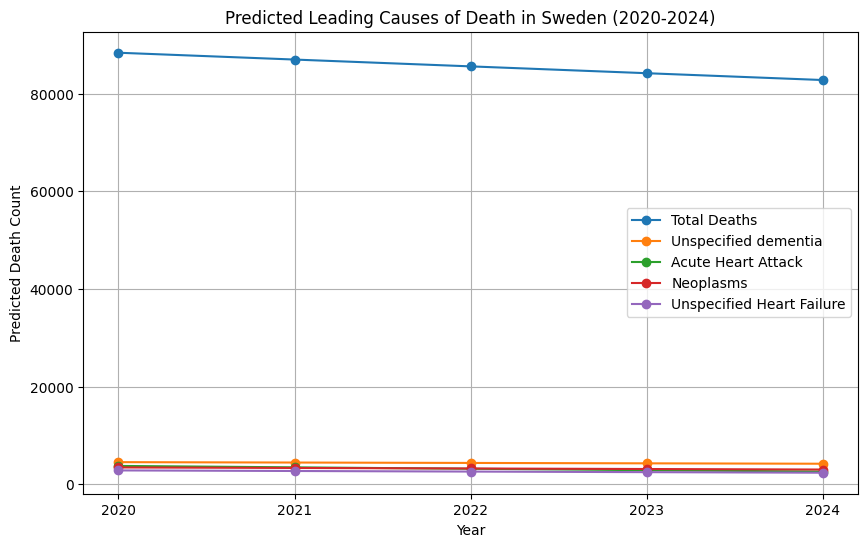

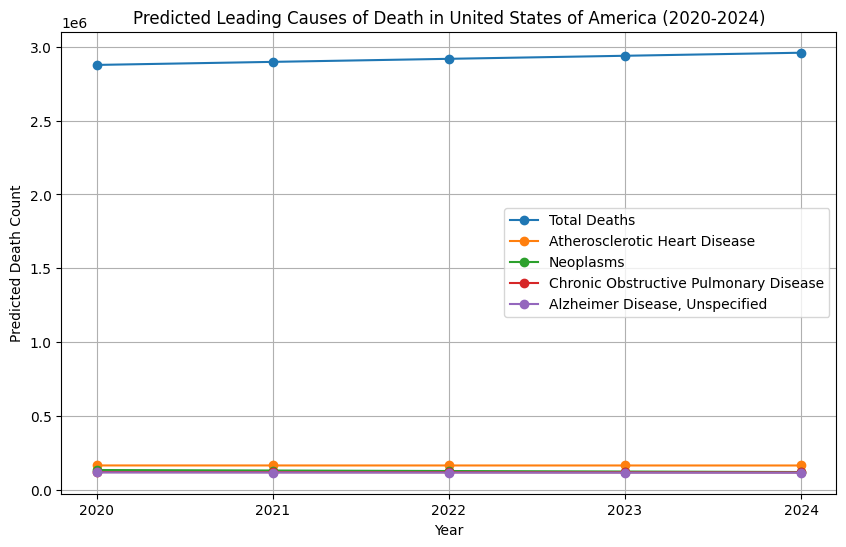

In [8]:
import matplotlib.pyplot as plt

# Dictionary to map old ICD codes to new names
icd_code_mapping = {
    'AAA': 'Total Deaths',
    'C349': 'Neoplasms',
    'I219': 'Acute Heart Attack',
    'F03': 'Unspecified dementia',
    'R99': 'Unknown Cause Of Death',
    'G309': 'Alzheimer Disease, Unspecified',
    'R54': 'Senility',
    'I709': 'Atherosclerosis', #Contributing factor of death
    'J189': 'Pneumonia, Unspecified',
    'I251': 'Atherosclerotic Heart Disease',
    'I259': 'Chronic Ischaemic Heart Disease',
    'I64': 'Stroke',
    'C169': 'Malignant Neoplasm Of Stomach, Unspecified',
    'A419': 'Sepsis, unspecified organism',
    'I509': 'Unspecified Heart Failure',
    'I500': 'Congestive Heart Failure',
    'J449': 'Chronic Obstructive Pulmonary Disease',
    # Add more mappings as needed
}

# Apply the mapping to the 'ICD Code' column in the original dataframe
top_five_predictions['ICD Code'] = top_five_predictions['ICD Code'].replace(icd_code_mapping)

# Ensure that 'predicted_count' values are sorted and top 5 causes are selected
top_five_predictions_sorted = top_five_predictions.sort_values(['Country Name', 'Year', 'predicted_count'], ascending=[True, True, False])

# List of unique countries
countries = top_five_predictions_sorted['Country Name'].unique()

# Create a plot for each country
for country in countries:
    # Filter the data for the current country
    country_data = top_five_predictions_sorted[top_five_predictions_sorted['Country Name'] == country]

    plt.figure(figsize=(10, 6))

    # Plot each ICD Code
    for icd_code in country_data['ICD Code'].unique():
        icd_data = country_data[country_data['ICD Code'] == icd_code]
        plt.plot(icd_data['Year'], icd_data['predicted_count'], marker='o', label=f'{icd_code}')

    # Add titles and labels
    plt.title(f'Predicted Leading Causes of Death in {country} (2020-2024)')
    plt.xlabel('Year')
    plt.ylabel('Predicted Death Count')
    plt.legend()
    plt.grid(True)

    plt.xticks([2020, 2021, 2022, 2023, 2024])

    plt.show()


Graph 1

Top 2 Causes From 2017-2021

In [9]:
# Filter the dataset for the years 2017, 2018, and 2019
filtered_all_df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021])]

# Group by Year, Country Name, and ICD Code, and sum the Deaths: All Ages for each group
df_all_grouped = filtered_all_df.groupby(['Year', 'Country Name', 'ICD Code']).agg({'Deaths: All Ages': 'sum'}).reset_index()

# Sort the grouped data to find the top 5 leading causes of death for each country and year
df_grouped_sorted_all = df_all_grouped.sort_values(['Year', 'Country Name', 'Deaths: All Ages'], ascending=[True, True, False])

# For each country and year, take the top 5 causes of death
top_5_deaths_all = df_grouped_sorted_all.groupby(['Year', 'Country Name']).head(2)

# Reset the index to clean up the DataFrame
top_5_deaths_all.reset_index(drop=True, inplace=True)

# Display the result
top_5_deaths_all

,Year,Country Name,ICD Code,Deaths: All Ages
0,2017,Australia,AAA,161083
1,2017,Australia,C349,8141
2,2017,Brazil,AAA,1312664
3,2017,Brazil,I219,90609
4,2017,Canada,AAA,276689
...,...,...,...,...
111,2021,Sweden,U071,5282
112,2021,Tunisia,AAA,71300
113,2021,Tunisia,U071,17967
114,2021,United States of America,AAA,3464231


Graphing Data

<ipython-input-10-69d6c7f944f0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_deaths_all['ICD Code'] = top_5_deaths_all['ICD Code'].replace(icd_code_mapping)
<ipython-input-10-69d6c7f944f0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_deaths_all.rename(columns={'Deaths: All Ages': 'Deaths'}, inplace=True)


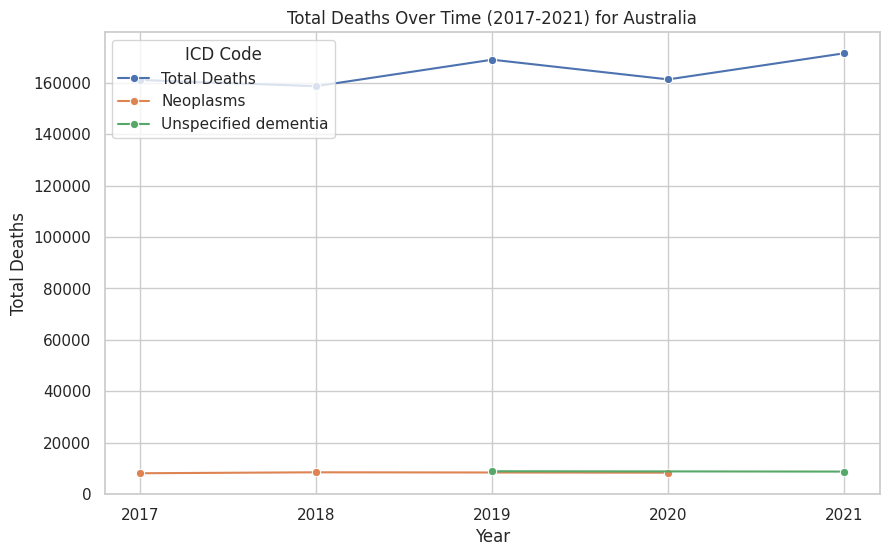

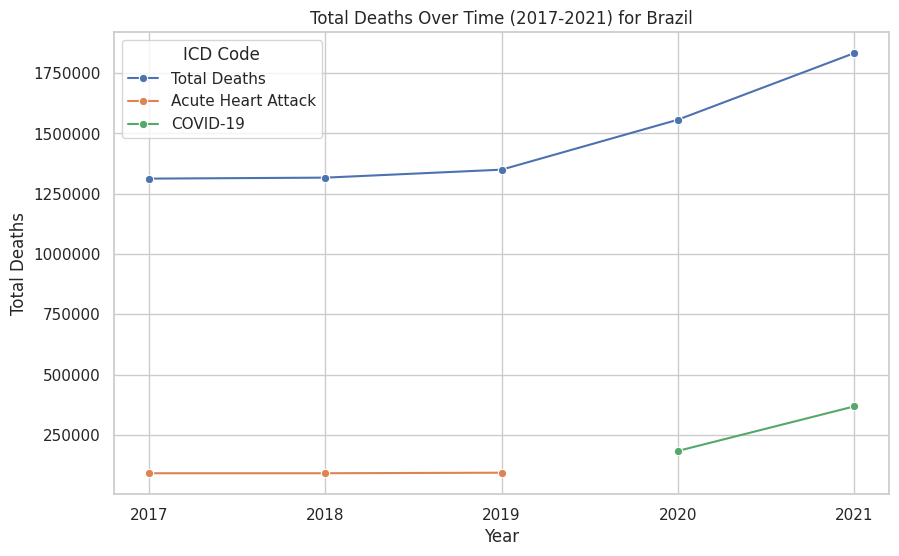

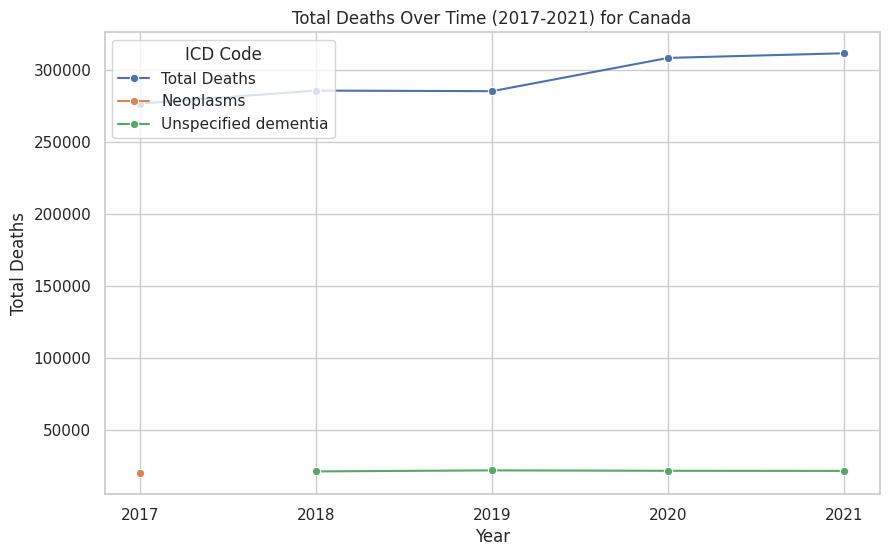

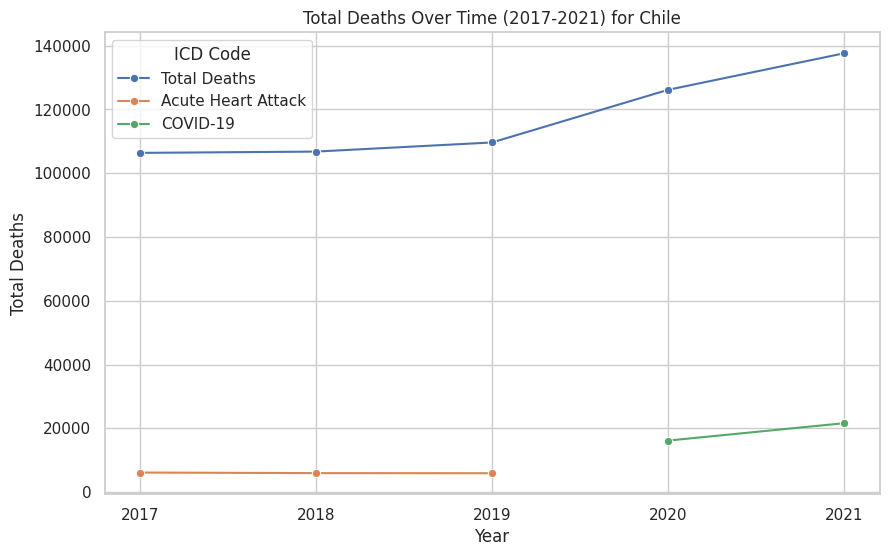

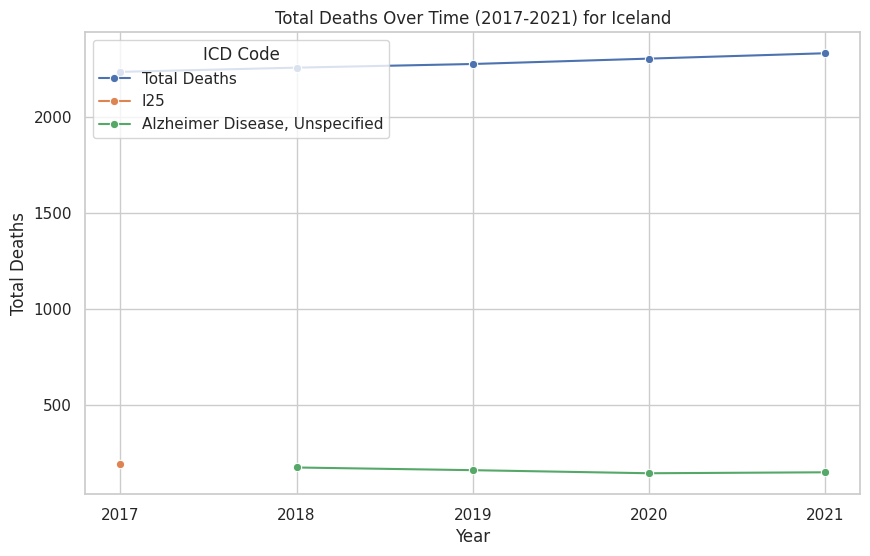

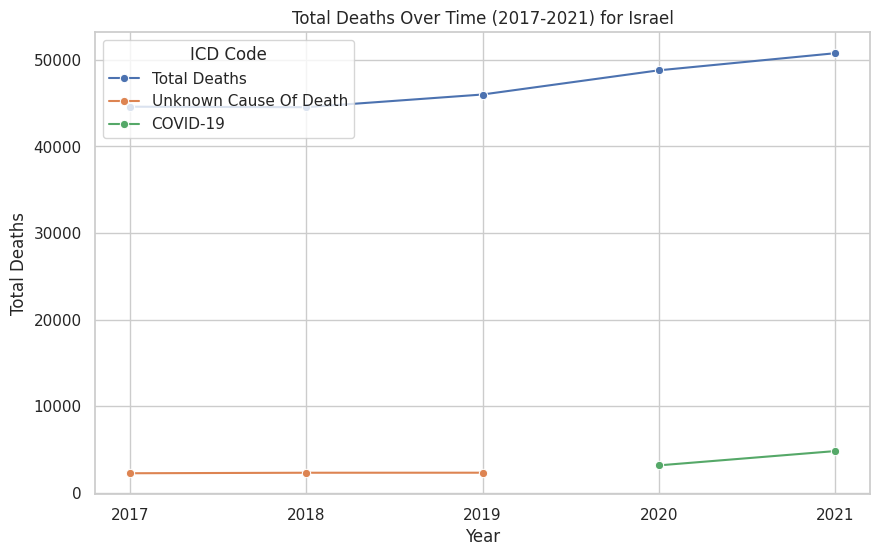

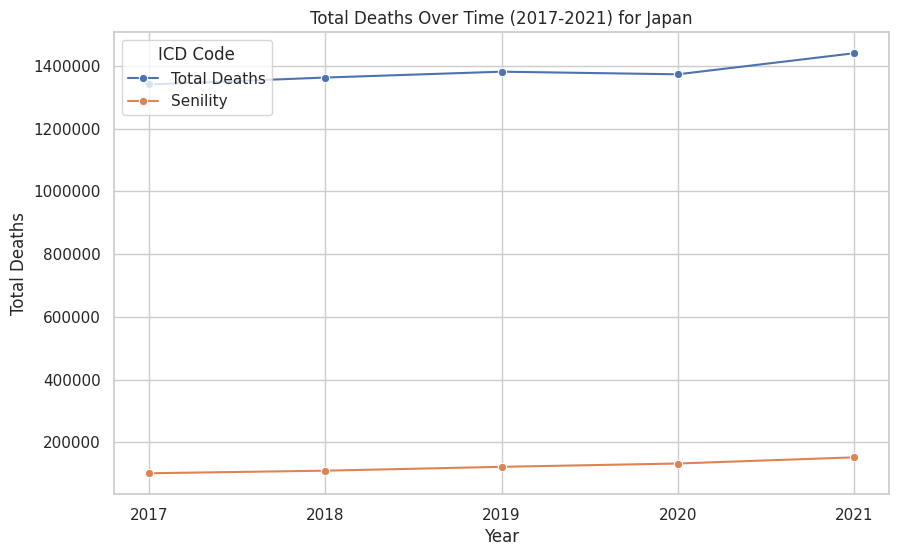

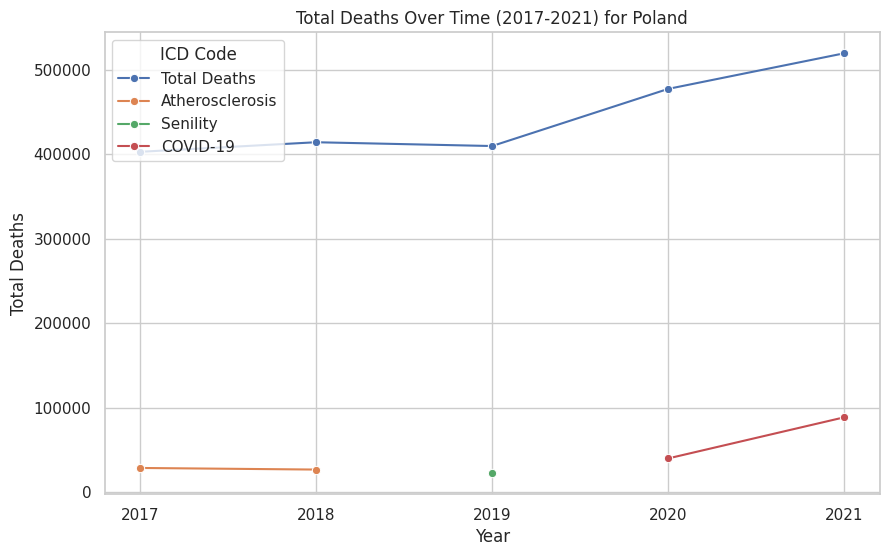

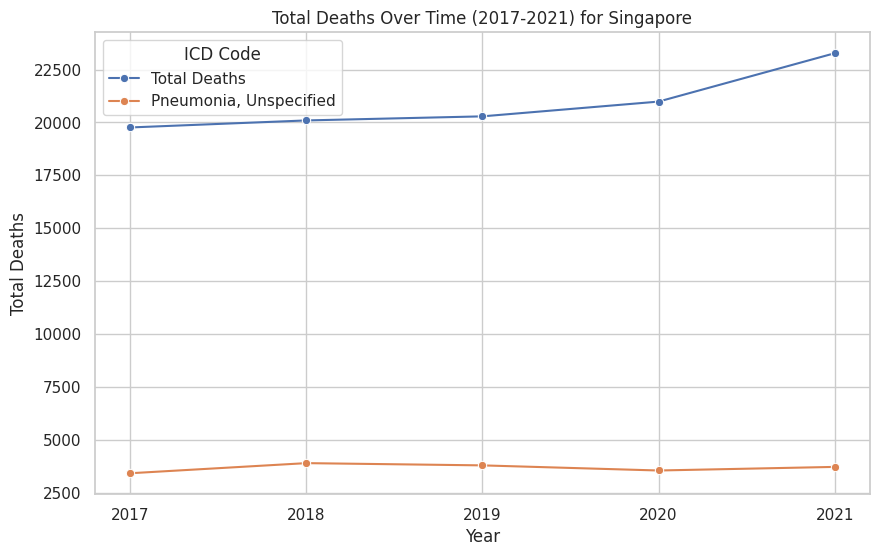

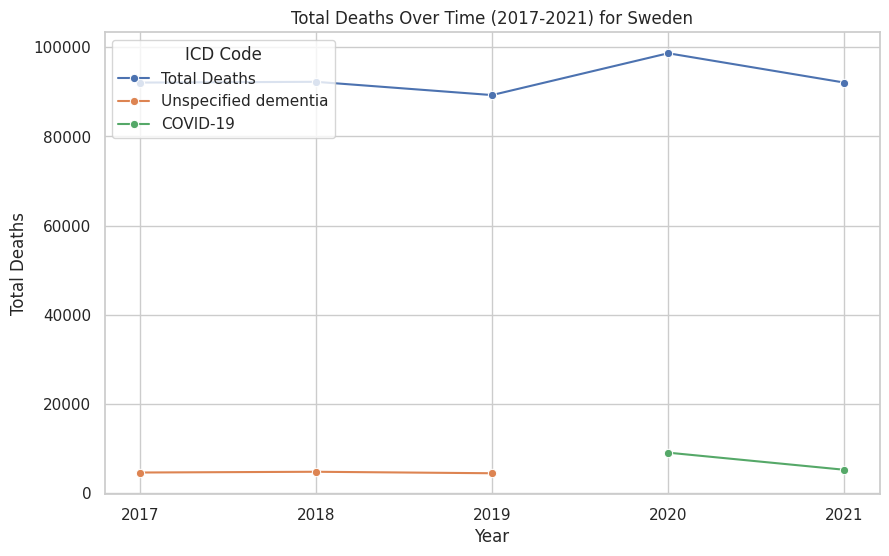

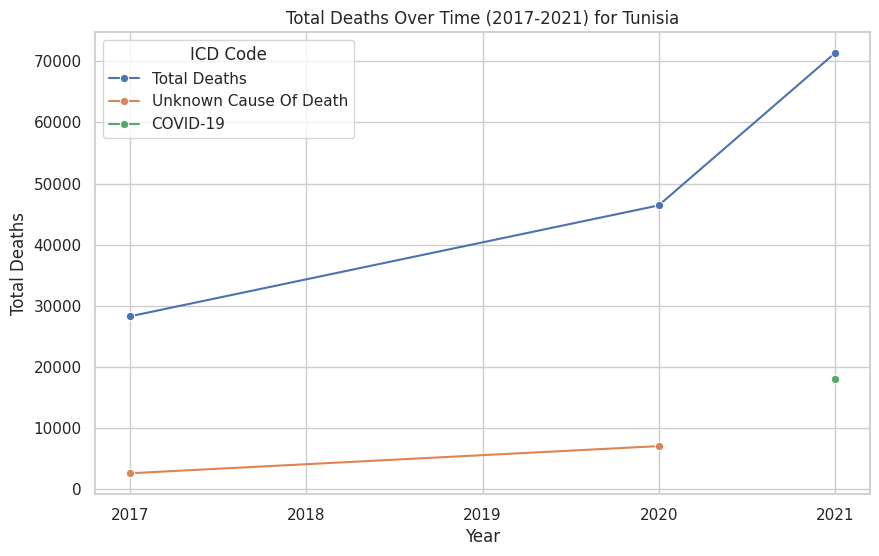

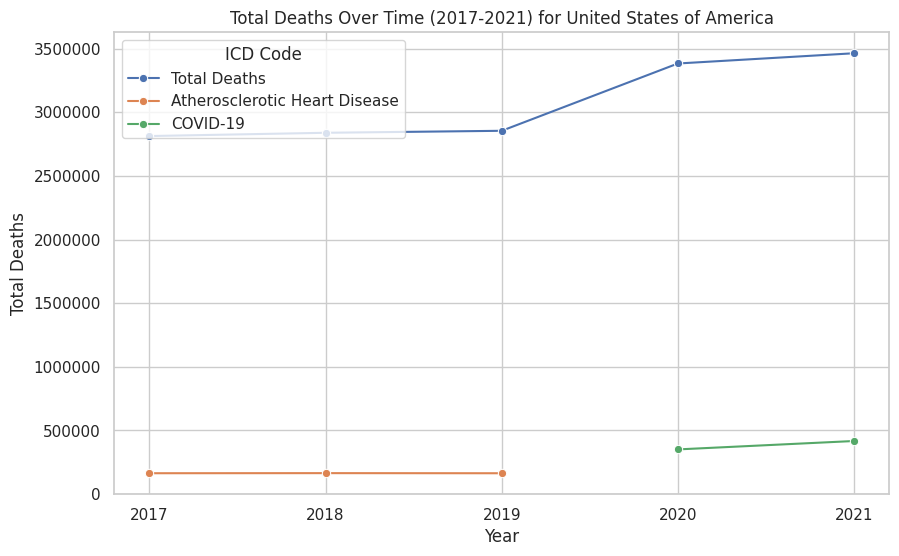

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Example mapping of ICD codes to new names
icd_code_mapping = {
    'U071': 'COVID-19',
    'AAA': 'Total Deaths',
    'C349': 'Neoplasms',
    'I219': 'Acute Heart Attack',
    'F03': 'Unspecified dementia',
    'R99': 'Unknown Cause Of Death',
    'G309': 'Alzheimer Disease, Unspecified',
    'R54': 'Senility',
    'I709': 'Atherosclerosis',
    'J189': 'Pneumonia, Unspecified',
    'I251': 'Atherosclerotic Heart Disease',
    'I259': 'Chronic Ischaemic Heart Disease',
    # Add all other ICD codes and their new names here
}


top_5_deaths_all['ICD Code'] = top_5_deaths_all['ICD Code'].replace(icd_code_mapping)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Assuming your dataframe is named `top_5_deaths_all`
# Rename 'Deaths: All Ages' to a more concise name for easier handling
top_5_deaths_all.rename(columns={'Deaths: All Ages': 'Deaths'}, inplace=True)

# Filter the data for the years 2017 to 2021
filtered_data = top_5_deaths_all[top_5_deaths_all['Year'].between(2017, 2021)]

# Get the list of countries in the dataframe
countries = filtered_data['Country Name'].unique()

# Set up the plot style
sns.set(style="whitegrid")

# Loop through each country to create a plot
for country in countries:
    # Filter data for the current country
    country_data = filtered_data[filtered_data['Country Name'] == country]

    # Create a line plot for this country
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=country_data, x='Year', y='Deaths', hue='ICD Code', marker='o')

    # Set plot title and labels
    plt.title(f'Total Deaths Over Time (2017-2021) for {country}')
    plt.xlabel('Year')
    plt.ylabel('Total Deaths')

    # Ensure the Y-axis uses standard notation
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    plt.ticklabel_format(style='plain', axis='y')

    # Set x-axis limits and ticks to show all years from 2017 to 2021
    plt.xticks([2017, 2018, 2019, 2020, 2021])

    plt.legend(title='ICD Code', loc='upper left')
    plt.grid(True)

    # Show the plot
    plt.show()





Top 2 Causes From 2017-2019

In [11]:
# Filter the dataset for the years 2017, 2018, and 2019
filtered_all_df2 = df[df['Year'].isin([2017, 2018, 2019])]

# Group by Year, Country Name, and ICD Code, and sum the Deaths: All Ages for each group
df_all_grouped2 = filtered_all_df2.groupby(['Year', 'Country Name', 'ICD Code']).agg({'Deaths: All Ages': 'sum'}).reset_index()

# Sort the grouped data to find the top 5 leading causes of death for each country and year
df_grouped_sorted_all2 = df_all_grouped2.sort_values(['Year', 'Country Name', 'Deaths: All Ages'], ascending=[True, True, False])

# For each country and year, take the top 5 causes of death
top_5_deaths_all2 = df_grouped_sorted_all2.groupby(['Year', 'Country Name']).head(2)

# Reset the index to clean up the DataFrame
top_5_deaths_all2.reset_index(drop=True, inplace=True)

# Display the result
top_5_deaths_all2

,Year,Country Name,ICD Code,Deaths: All Ages
0,2017,Australia,AAA,161083
1,2017,Australia,C349,8141
2,2017,Brazil,AAA,1312664
3,2017,Brazil,I219,90609
4,2017,Canada,AAA,276689
...,...,...,...,...
63,2019,Singapore,J189,3794
64,2019,Sweden,AAA,89276
65,2019,Sweden,F03,4500
66,2019,United States of America,AAA,2854838


Predictions For Top 2 Causes

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare to store models and predictions
models = {}
future_years = np.array([[2020], [2021]])

# Loop through each country and ICD Code to fit a model
for country_name in top_5_deaths_all2['Country Name'].unique():
    for icd_code in top_5_deaths_all2['ICD Code'].unique():
        # Filter the data for the specific country and ICD Code
        df_subset2 = top_5_deaths_all2[(top_5_deaths_all2['Country Name'] == country_name) &
                                               (top_5_deaths_all2['ICD Code'] == icd_code)]

        if len(df_subset2) > 1:  # Need at least 2 data points to fit a model
            X = df_subset2[['Year']].values
            y = df_subset2['Deaths: All Ages'].values

            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X, y)

            # Store the model for future predictions
            models[(country_name, icd_code)] = model

# Prepare to store predictions
predictions2 = []

# Make predictions for future years
for (country_name, icd_code), model in models.items():
    future_counts = model.predict(future_years)

    for year, count in zip(future_years.flatten(), future_counts):
        predictions2.append({
            'Country Name': country_name,
            'ICD Code': icd_code,
            'Year': year,
            'predicted_count': count
        })

# Convert predictions to a DataFrame
predictions_df2 = pd.DataFrame(predictions2)

# Sort the predictions to identify the top 5 causes of death for each country/year
top_five_predictions2 = predictions_df2.sort_values(['Country Name', 'Year', 'predicted_count'], ascending=[True, True, False])

# Get the top 5 ICD Codes for each country and year
top_five_predictions2 = top_five_predictions2.groupby(['Country Name', 'Year']).head(5)

# Display the result
display(top_five_predictions2)



,Country Name,ICD Code,Year,predicted_count
0,Australia,AAA,2020,1.707807e+05
2,Australia,C349,2020,9.251000e+03
1,Australia,AAA,2021,1.747202e+05
3,Australia,C349,2021,9.621000e+03
4,Brazil,AAA,2020,1.363532e+06
6,Brazil,I219,2020,9.358500e+04
5,Brazil,AAA,2021,1.382100e+06
7,Brazil,I219,2021,9.469700e+04
8,Canada,AAA,2020,2.911767e+05
10,Canada,F03,2020,2.266600e+04


Graphing Predictions

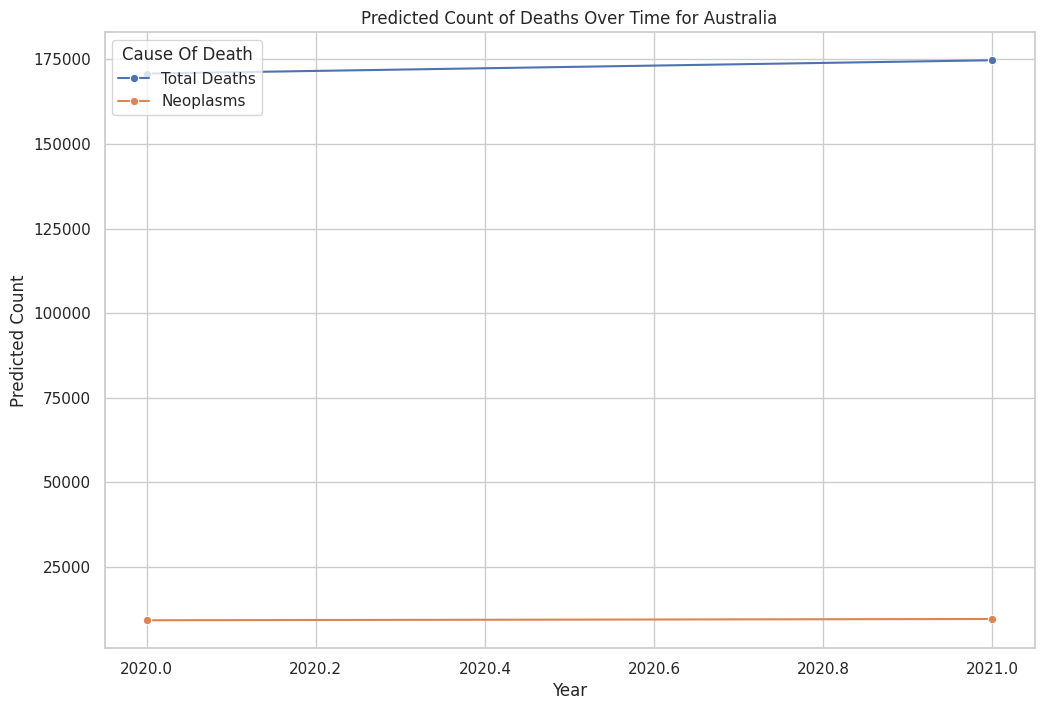

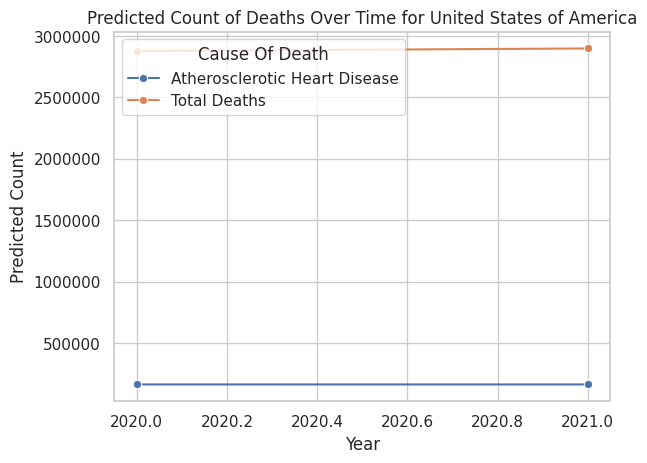

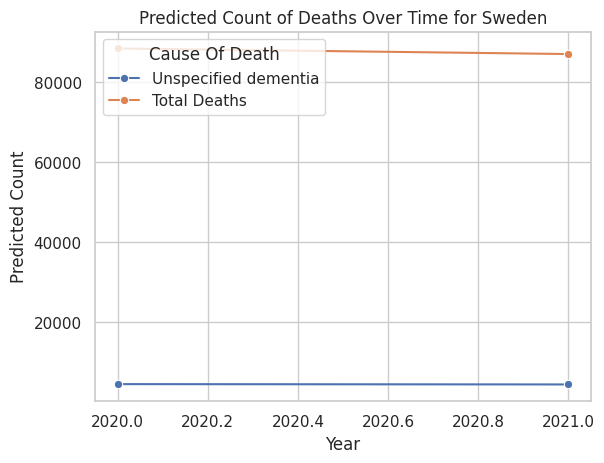

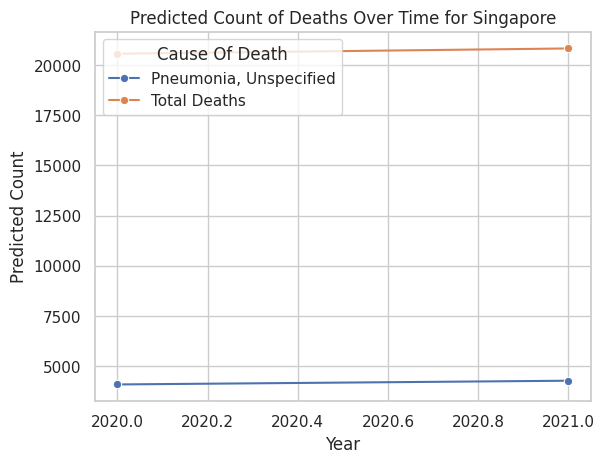

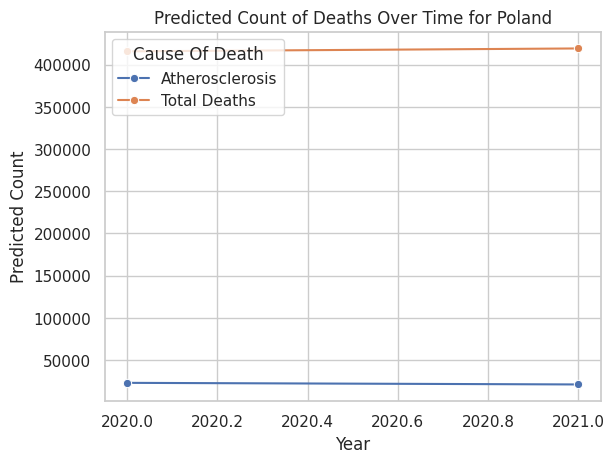

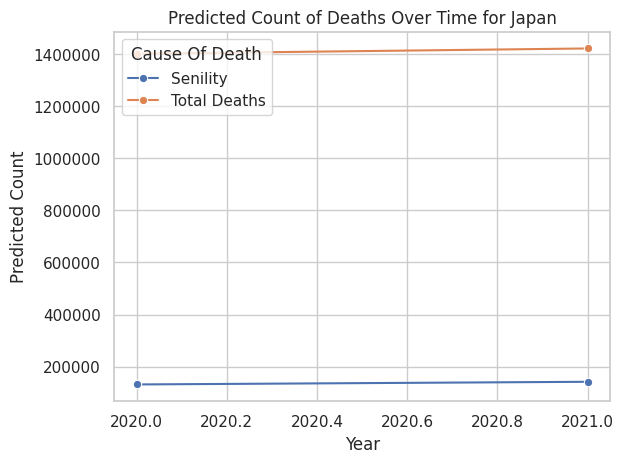

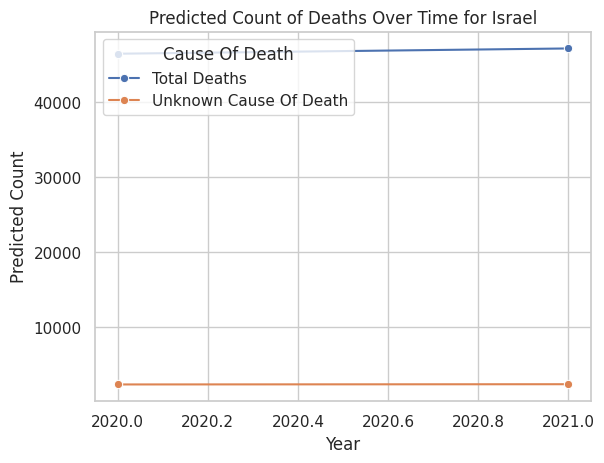

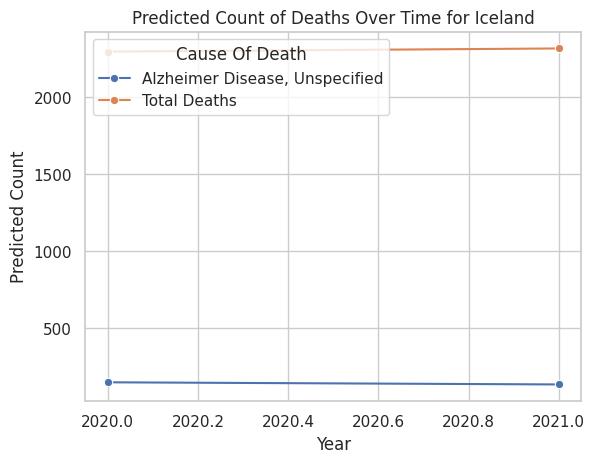

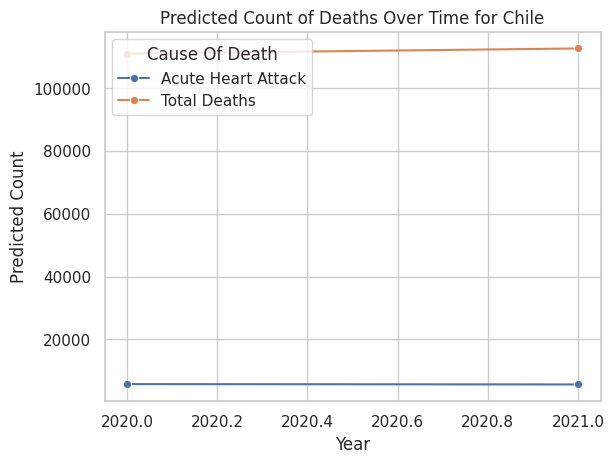

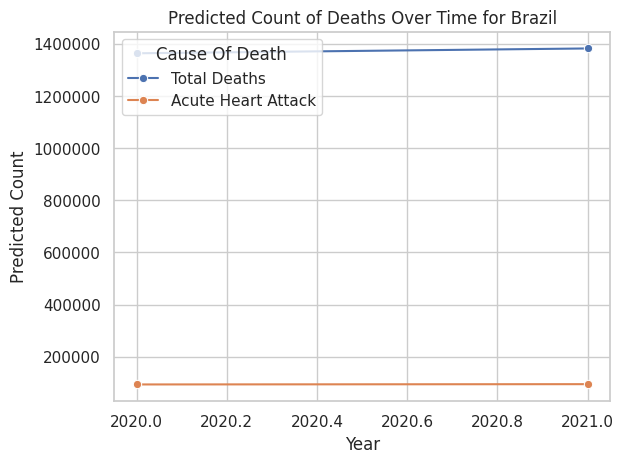

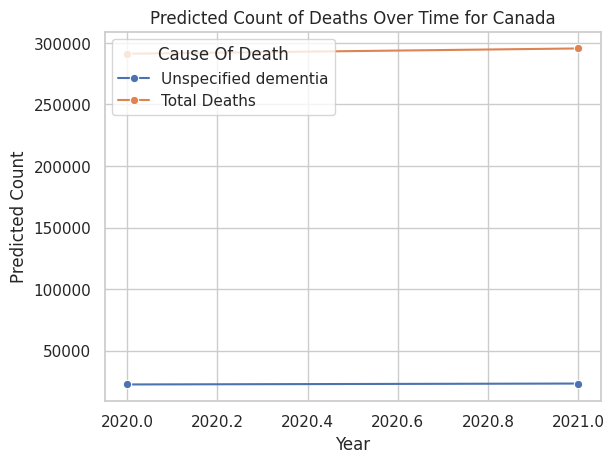

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Example mapping of ICD codes to new names
icd_code_mapping = {
    'AAA': 'Total Deaths',
    'C349': 'Neoplasms',
    'I219': 'Acute Heart Attack',
    'F03': 'Unspecified dementia',
    'R99': 'Unknown Cause Of Death',
    'G309': 'Alzheimer Disease, Unspecified',
    'R54': 'Senility',
    'I709': 'Atherosclerosis',
    'J189': 'Pneumonia, Unspecified',
    'I251': 'Atherosclerotic Heart Disease',
    'I259': 'Chronic Ischaemic Heart Disease',
    # Add all other ICD codes and their new names here
}

# Assuming your dataframe is named `top_five_predictions2`
# Apply the mapping to rename the ICD codes
top_five_predictions2['ICD Code'] = top_five_predictions2['ICD Code'].replace(icd_code_mapping)

# Now, proceed with sorting and plotting as before
top_five_predictions2 = top_five_predictions2.sort_values(by='Year')

# Get the list of countries in the dataframe
countries = top_five_predictions2['Country Name'].unique()

# Set up the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Loop through each country to create a plot
for country in countries:
    # Filter data for the current country
    country_data = top_five_predictions2[top_five_predictions2['Country Name'] == country]

    # Create a line plot for this country
    sns.lineplot(data=country_data, x='Year', y='predicted_count', hue='ICD Code', marker='o')

    # Set plot title and labels
    plt.title(f'Predicted Count of Deaths Over Time for {country}')
    plt.xlabel('Year')
    plt.ylabel('Predicted Count')

    # Ensure the Y-axis uses standard notation
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    plt.ticklabel_format(style='plain', axis='y')

    plt.legend(title='Cause Of Death', loc='upper left')
    plt.grid(True)

    # Show the plot
    plt.show()


All COVID Deaths "Country/Year_2020-2021"

In [14]:
# Filter the DataFrame for the years 2017, 2018, 2019 (if not already filtered)
filtered_df = df[df['Year'].isin([2020, 2021])]

# Define the COVID-related ICD codes
covid_icd_codes = ['U071', 'U099']

# Filter the DataFrame for rows with COVID-related ICD codes
df_covid = filtered_df[filtered_df['ICD Code'].isin(covid_icd_codes)]

# Group by 'years', 'Country Code', and 'ICD Code', then count occurrences
grouped = df_covid.groupby(['Year', 'Country Code', 'Country Name']).sum().reset_index()

# Sort the grouped data by year and country
grouped_sorted = grouped.sort_values(['Year', 'Country Code'], ascending=[True, True])

#Create New Dataframe
Covid_Death = grouped_sorted[['Year', 'Country Name', 'Deaths: All Ages']]

# Display the result
display(Covid_Death)

#Add a column summing all of the ICD codes and then doing this





,Year,Country Name,Deaths: All Ages
0,2020,Tunisia,2569
1,2020,Brazil,182981
2,2020,Canada,14910
3,2020,Chile,16189
4,2020,United States of America,350831
5,2020,Israel,3149
6,2020,Japan,3466
7,2020,Singapore,25
8,2020,Iceland,29
9,2020,Poland,40028


In [15]:
#Deadly Dozen
# Group by 'Year' and sum the deaths
df_grouped = df.groupby('Year')
sum_yearly_deaths = df_grouped[['Deaths: All Ages']].sum()

sum_yearly_deaths

,Deaths: All Ages
Year,
2017,13201082
2018,13285788
2019,13434414
2020,15207406
2021,16233490


Total Deaths Across 12 Countries From 2017-2019

In [16]:
Death_Predict = sum_yearly_deaths.head(3)
Death_Predict

,Deaths: All Ages
Year,
2017,13201082
2018,13285788
2019,13434414


Total Deaths Across 12 Countries Predict

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming the Death_Predict dataframe is already loaded
# Reset the index to use 'Year' as a regular column
Death_Predict = Death_Predict.reset_index()

# Rename columns for easier access
Death_Predict.columns = ['ds', 'y']

# Convert 'ds' (Year) to numeric
Death_Predict['ds'] = pd.to_numeric(Death_Predict['ds'])

# Reshape the data for sklearn
X = Death_Predict['ds'].values.reshape(-1, 1)
y = Death_Predict['y'].values

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict for the years 2020 and 2021
future_years = np.array([2020, 2021]).reshape(-1, 1)
predictions = model.predict(future_years)

# Create a DataFrame with the results
predictions_df = pd.DataFrame({
    'Year': [2020, 2021],
    'Predicted Deaths': predictions
})

# Set pandas options to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the predictions
predictions_df


,Year,Predicted Deaths
0,2020,13540426.67
1,2021,13657092.67


Actual Death

In [18]:
Death_actual = sum_yearly_deaths.tail(2)
Death_actual

,Deaths: All Ages
Year,
2020,15207406
2021,16233490


Combining

In [19]:
import pandas as pd

# Assuming predictions_df and Death_actual are already defined

# Ensure both dataframes have the 'Year' column correctly named
# If the column names are different, rename them
predictions_df = predictions_df.rename(columns={'year': 'Year'})
Death_actual = Death_actual.rename(columns={'year': 'Year'})

# Merge the dataframes on the 'Year' column
combined_df = pd.merge(predictions_df, Death_actual, on='Year', how='outer')

# Display the combined dataframe
combined_df


,Year,Predicted Deaths,Deaths: All Ages
0,2020,13540426.67,15207406
1,2021,13657092.67,16233490


Graph

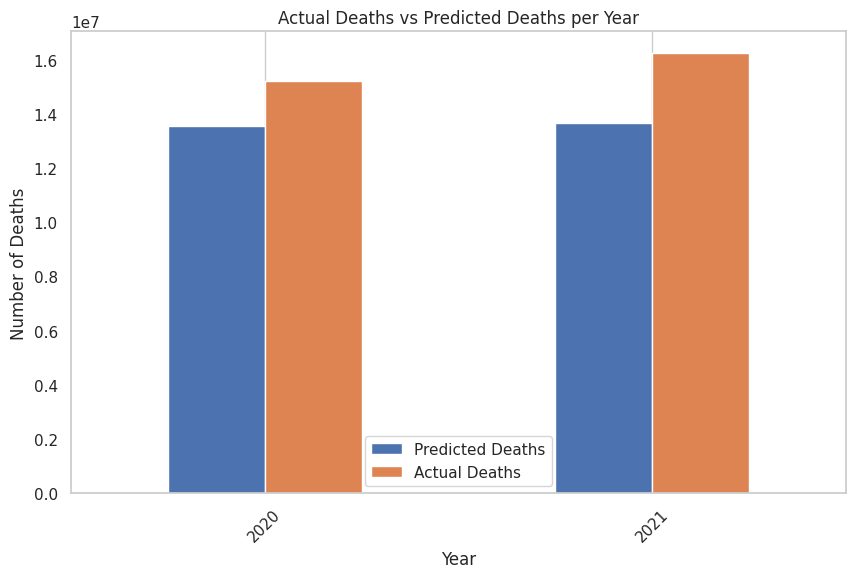

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_df is the dataframe with columns 'Year', 'Predicted Deaths', and 'Deaths: All Ages'

# Plotting the bar graph
combined_df.plot(x='Year', y=['Predicted Deaths', 'Deaths: All Ages'], kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Actual Deaths vs Predicted Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(['Predicted Deaths', 'Actual Deaths'])

# Show the plot
plt.show()


Original Deaths

Do Total COVID deaths, compared with leading cause of death and predicted leading cause of death

Take total global deaths for 2017-2019 and predict the total death toll for 2020-2021